# NOT READY FOR FEEDBACK
<span style="color:red"> Still working on formatting my data for analysis. No analysis ready. </span>

Data analysis.

Use summary functions like mean and standard deviation along with visual displays like scatterplots and histograms to describe data.

Provide at least one model showing patterns or relationships between variables that addresses your research question. This could be a regression or clustering, or something else that measures some property of the dataset.
Evaluation of significance. Use hypothesis tests, simulation, randomization, or any other techniques we have learned to compare the patterns you observe in the dataset to simple randomness. 

Interpretation and conclusions. 
What did you find over the course of your data analysis, and how confident are you in these conclusions? Detail your results more than you did in the introduction, now that the reader is familiar with your methods and analysis. Interpret these results in the wider context of the real-life application from where your data hails.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date

from   scipy.optimize import curve_fit
from   sklearn.linear_model import LinearRegression


%matplotlib inline

# State Level Covid, Vaccinations, and Mobility data

In [3]:
state_df = pd.read_csv('Project_Data')
state_df.date = pd.to_datetime(state_df.date)

In [4]:
state_df['trips_log'] = state_df.trips.apply(lambda x: np.log(x))
state_df['new_case_log'] = state_df.new_case.apply(lambda x: np.log(x))
state_df['new_death_log'] = state_df.new_death.apply(lambda x: np.log(x))
state_df['series_complete_yes_log'] = state_df.series_complete_yes	.apply(lambda x: np.log(x))
state_df['death_rate'] = state_df['tot_death'] / state_df['tot_cases']

In [5]:
state_df.sample(5)

,date,state,pop_stay_at_home,pop_not_stay_at_home,trips,trips_500,trips_1_50,trips_50_500,tot_cases,new_case,tot_death,new_death,administered,series_complete_yes,trips_log,new_case_log,new_death_log,series_complete_yes_log,death_rate
53298,2021-10-24,UT,NaN,NaN,NaN,NaN,NaN,NaN,538895.0,0.0,3128.0,0.0,3641250.0,1700643.0,NaN,-inf,-inf,14.346517,0.005804
1107,2019-01-22,AK,161062.0,574120.0,2733503.0,9243.0,2683878.0,40382.0,NaN,NaN,NaN,NaN,NaN,NaN,14.821094,NaN,NaN,NaN,NaN
31367,2020-09-07,AR,725912.0,2287913.0,6924451.0,7517.0,6537966.0,378968.0,66280.0,348.0,908.0,14.0,NaN,NaN,15.750569,5.852202,2.639057,NaN,0.013699
29438,2020-07-31,NV,852694.0,2181698.0,7294377.0,14206.0,7045638.0,234533.0,48312.0,1142.0,856.0,29.0,NaN,NaN,15.802614,7.040536,3.367296,NaN,0.017718
36110,2020-12-09,AK,233508.0,503930.0,1893904.0,4895.0,1848250.0,40759.0,37827.0,573.0,242.0,2.0,NaN,NaN,14.454151,6.350886,0.693147,NaN,0.006398


## Here's the last 10 instances (days) for a random state

In [6]:
state_df[state_df.state == state_df.sample().state.iat[0]].tail(10)

,date,state,pop_stay_at_home,pop_not_stay_at_home,trips,trips_500,trips_1_50,trips_50_500,tot_cases,new_case,tot_death,new_death,administered,series_complete_yes,trips_log,new_case_log,new_death_log,series_complete_yes_log,death_rate
53157,2021-10-13,SC,NaN,NaN,NaN,NaN,NaN,NaN,882048.0,954.0,13096.0,41.0,5453456.0,2498894.0,NaN,6.860664,3.713572,14.731359,0.014847
53187,2021-10-25,SC,NaN,NaN,NaN,NaN,NaN,NaN,894499.0,726.0,13563.0,3.0,5614897.0,2553535.0,NaN,6.587550,1.098612,14.752989,0.015163
53190,2021-11-22,SC,NaN,NaN,NaN,NaN,NaN,NaN,913928.0,616.0,14130.0,1.0,6095802.0,2631574.0,NaN,6.423247,0.000000,14.783093,0.015461
53195,2021-10-12,SC,NaN,NaN,NaN,NaN,NaN,NaN,881094.0,989.0,13055.0,21.0,5444965.0,2495901.0,NaN,6.896694,3.044522,14.730160,0.014817
53207,2021-10-20,SC,NaN,NaN,NaN,NaN,NaN,NaN,889935.0,955.0,13370.0,48.0,5550905.0,2534121.0,NaN,6.861711,3.871201,14.745357,0.015024
53219,2021-09-14,SC,NaN,NaN,NaN,NaN,NaN,NaN,809116.0,4304.0,11350.0,42.0,5029742.0,2325482.0,NaN,8.367300,3.737670,14.659438,0.014028
53225,2021-09-21,SC,NaN,NaN,NaN,NaN,NaN,NaN,835495.0,2205.0,11835.0,110.0,5136244.0,2377394.0,NaN,7.698483,4.700480,14.681515,0.014165
53226,2021-09-17,SC,NaN,NaN,NaN,NaN,NaN,NaN,821972.0,4904.0,11617.0,80.0,5083081.0,2349828.0,NaN,8.497806,4.382027,14.669853,0.014133
53236,2021-11-20,SC,NaN,NaN,NaN,NaN,NaN,NaN,912459.0,913.0,14108.0,18.0,6058188.0,2626608.0,NaN,6.816736,2.890372,14.781204,0.015462
53963,2021-11-24,SC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6118807.0,2634512.0,NaN,NaN,NaN,14.784209,NaN


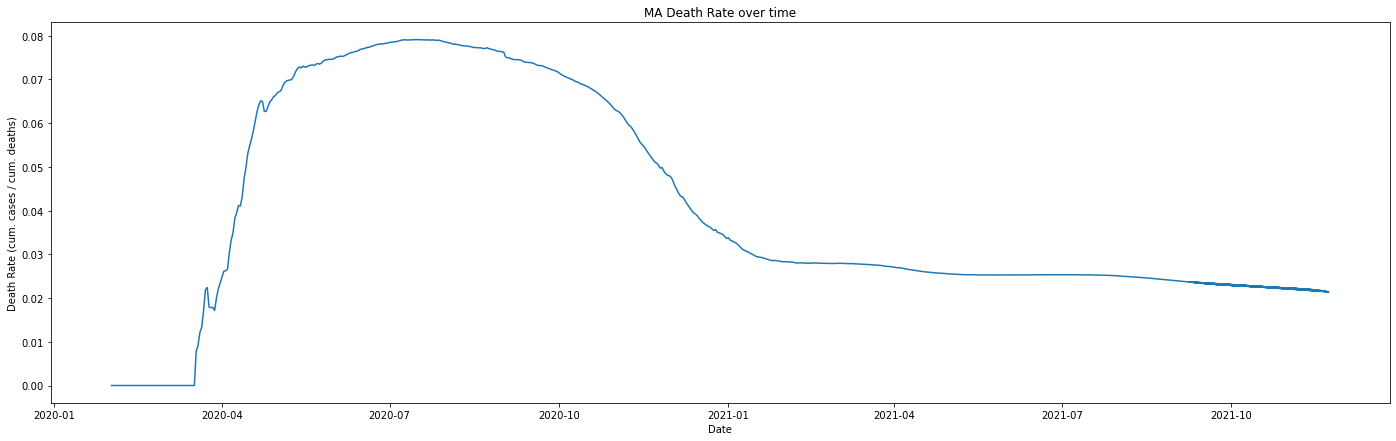

In [7]:
temp_df = state_df[state_df['state'] == 'MA']
temp_df[temp_df['death_rate'] != np.inf]


plt.figure(figsize=(24,7))
plt.plot(
    temp_df[pd.notnull(temp_df['death_rate'])].date,
    temp_df[pd.notnull(temp_df['death_rate'])].death_rate,
)
plt.xlabel('Date')
plt.ylabel('Death Rate (cum. cases / cum. deaths)')
plt.title('MA Death Rate over time')
plt.show()

# County Level Covid and Internet Data Analysis

In [105]:
og_county_covid_df = pd.read_csv('/Users/josephgreene/Library/CloudStorage/Box-Box/project_county_covid_data')
og_county_internet_df = pd.read_csv('project_county_internet_data')

In [106]:
county_covid_df = og_county_covid_df.copy()
county_internet_df = og_county_internet_df.copy()

In [107]:
county_covid_df['date'] = pd.to_datetime(county_covid_df['date'])
county_covid_df.drop(columns='Unnamed: 0',inplace=True)
current_covid = county_covid_df.groupby(by='fips_code').max()
current_covid['death_rate'] = current_covid['tot_deaths'] / current_covid['tot_cases']
current_covid.drop(columns=[
    'cases',
    'cases_avg',
#     'cases_avg_per_100k',
    'deaths',
    'deaths_avg',
#     'deaths_avg_per_100k'
],inplace=True)

In [108]:
county_internet_df.drop(columns='Unnamed: 0', inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [115]:
# county_df is the most recent Covid data merged with internet data by county

county_df = pd.merge(current_covid,county_internet_df,on='fips_code',how='left')
print(county_df.shape)
county_df.head()

(3273, 14)


,fips_code,date,county,state,cases_avg_per_100k,deaths_avg_per_100k,tot_deaths,tot_cases,death_rate,dr_rating,AverageMbps,FastestAverageMbps,avg_mbps_rating,fast_mbps_rating
0,1001,2021-11-17,Autauga,Alabama,148.05,3.84,155,10423,0.014871,5.0,38.218333,76.748333,3.0,2.0
1,1003,2021-11-17,Baldwin,Alabama,147.83,3.78,779,44672,0.017438,5.0,50.272632,140.296842,4.0,4.0
2,1005,2021-11-17,Barbour,Alabama,120.37,11.00,128,6538,0.019578,5.0,52.206667,113.016667,4.0,4.0
3,1007,2021-11-17,Bibb,Alabama,130.77,14.03,733,30266,0.024219,5.0,23.557143,60.075714,2.0,2.0
4,1009,2021-11-17,Blount,Alabama,118.34,3.95,460,34692,0.013260,5.0,29.145714,76.307143,2.0,2.0


In [116]:
county_df.AverageMbps.count()

3044

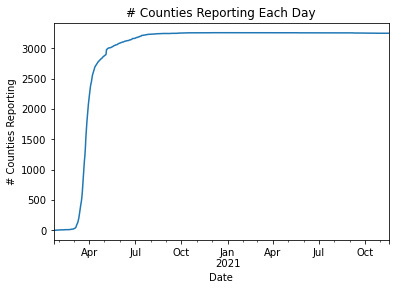

In [117]:
county_covid_df.groupby('date').size().plot()
plt.ylabel('# Counties Reporting')
plt.xlabel('Date')
plt.title("# Counties Reporting each day".title())
plt.show()

In [118]:
def merge_internet(df):
    df2 = pd.merge(df,county_internet_df,on='fips_code',how='inner')
    df2['death_rate'] = df2['tot_deaths'] / df2['tot_cases']
    df2.drop(columns=['cases','cases_avg','cases_avg_per_100k','deaths','deaths_avg','deaths_avg_per_100k'],inplace=True)
    return df2

In [120]:
print("Most recent Covid Data")
county_df.drop(columns=['fips_code']).corr().style.background_gradient(
    cmap='RdYlGn', 
    axis=None,
    vmin=-0.8, 
    vmax=0.8
)

Most recent Covid Data


,cases_avg_per_100k,deaths_avg_per_100k,tot_deaths,tot_cases,death_rate,dr_rating,AverageMbps,FastestAverageMbps,avg_mbps_rating,fast_mbps_rating
cases_avg_per_100k,1.000000,0.364837,-0.079318,-0.087310,0.095638,-0.042927,-0.195534,-0.214170,-0.203952,-0.219850
deaths_avg_per_100k,0.364837,1.000000,-0.087690,-0.106070,0.423821,0.123522,-0.266561,-0.289301,-0.293637,-0.306793
tot_deaths,-0.079318,-0.087690,1.000000,0.877166,0.241390,0.197746,0.157587,0.167833,0.145056,0.151713
tot_cases,-0.087310,-0.106070,0.877166,1.000000,0.013638,0.213577,0.167837,0.178576,0.153794,0.160893
death_rate,0.095638,0.423821,0.241390,0.013638,1.000000,0.409544,-0.144088,-0.145187,-0.142955,-0.144917
dr_rating,-0.042927,0.123522,0.197746,0.213577,0.409544,1.000000,0.099090,0.115457,0.112906,0.123784
AverageMbps,-0.195534,-0.266561,0.157587,0.167837,-0.144088,0.099090,1.000000,0.961186,0.882337,0.860745
FastestAverageMbps,-0.214170,-0.289301,0.167833,0.178576,-0.145187,0.115457,0.961186,1.000000,0.880676,0.902430
avg_mbps_rating,-0.203952,-0.293637,0.145056,0.153794,-0.142955,0.112906,0.882337,0.880676,1.000000,0.950817
fast_mbps_rating,-0.219850,-0.306793,0.151713,0.160893,-0.144917,0.123784,0.860745,0.902430,0.950817,1.000000


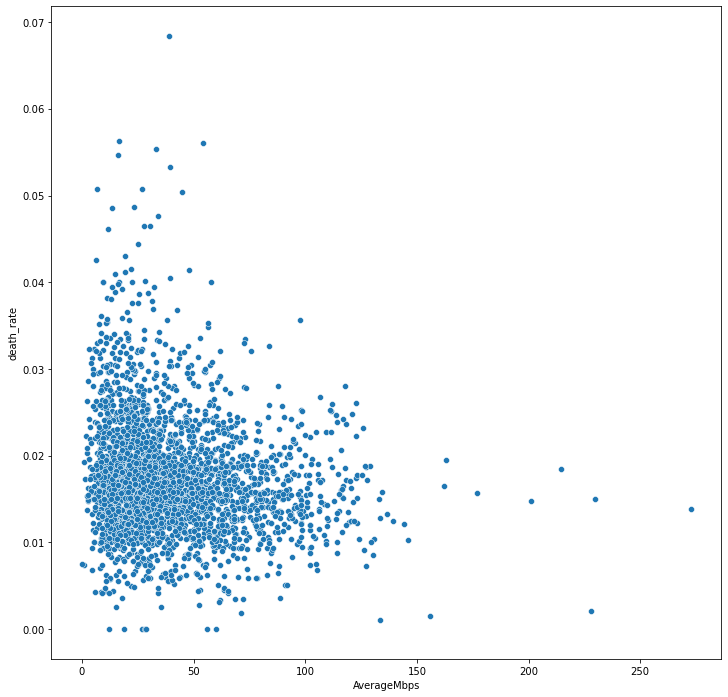

In [121]:
fig, plot = plt.subplots()
plot = sns.scatterplot(
    x='AverageMbps',
    y='death_rate',
    data=county_df,
)

fig.set_size_inches(12,12)
# rplt.figure(figsize=(12,12))
plt.show()

In [122]:
county_df[county_df.death_rate == 0].sample(10)

,fips_code,date,county,state,cases_avg_per_100k,deaths_avg_per_100k,tot_deaths,tot_cases,death_rate,dr_rating,AverageMbps,FastestAverageMbps,avg_mbps_rating,fast_mbps_rating
3203,72027,2021-11-17,Camuy,Puerto Rico,52.45,0.0,0,1802,0.0,0.0,NaN,NaN,NaN,NaN
3198,72017,2021-11-17,Barceloneta,Puerto Rico,38.90,0.0,0,1202,0.0,0.0,NaN,NaN,NaN,NaN
555,15005,2021-11-17,Kalawao,Hawaii,166.11,0.0,0,1,0.0,0.0,NaN,NaN,NaN,NaN
3265,72149,2021-11-17,Villalba,Puerto Rico,53.22,0.0,0,1027,0.0,0.0,NaN,NaN,NaN,NaN
3218,72055,2021-11-17,Guanica,Puerto Rico,22.05,0.0,0,455,0.0,0.0,NaN,NaN,NaN,NaN
3257,72133,2021-11-17,Santa Isabel,Puerto Rico,42.10,0.0,0,874,0.0,0.0,NaN,NaN,NaN,NaN
3247,72113,2021-11-17,Ponce,Puerto Rico,31.75,0.0,0,5707,0.0,0.0,NaN,NaN,NaN,NaN
3236,72091,2021-11-17,Manati,Puerto Rico,39.35,0.0,0,2368,0.0,0.0,NaN,NaN,NaN,NaN
3221,72061,2021-11-17,Guaynabo,Puerto Rico,42.80,0.0,0,6891,0.0,0.0,NaN,NaN,NaN,NaN
3252,72123,2021-11-17,Salinas,Puerto Rico,36.92,0.0,0,1453,0.0,0.0,NaN,NaN,NaN,NaN


## Now looking only at March through June of 2020death_rate

In [123]:
# method from https://www.kite.com/python/answers/how-to-filter-pandas-dataframe-rows-by-date-in-python

start_date = "2020-09-01"
end_date = "2020-12-30"


after_start_date = county_covid_df["date"] >= start_date
before_end_date = county_covid_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = county_covid_df.loc[between_two_dates]

In [124]:
temp_df = merge_internet(county_covid_df.loc[between_two_dates])
temp_df = temp_df.dropna(subset=['AverageMbps','death_rate'])

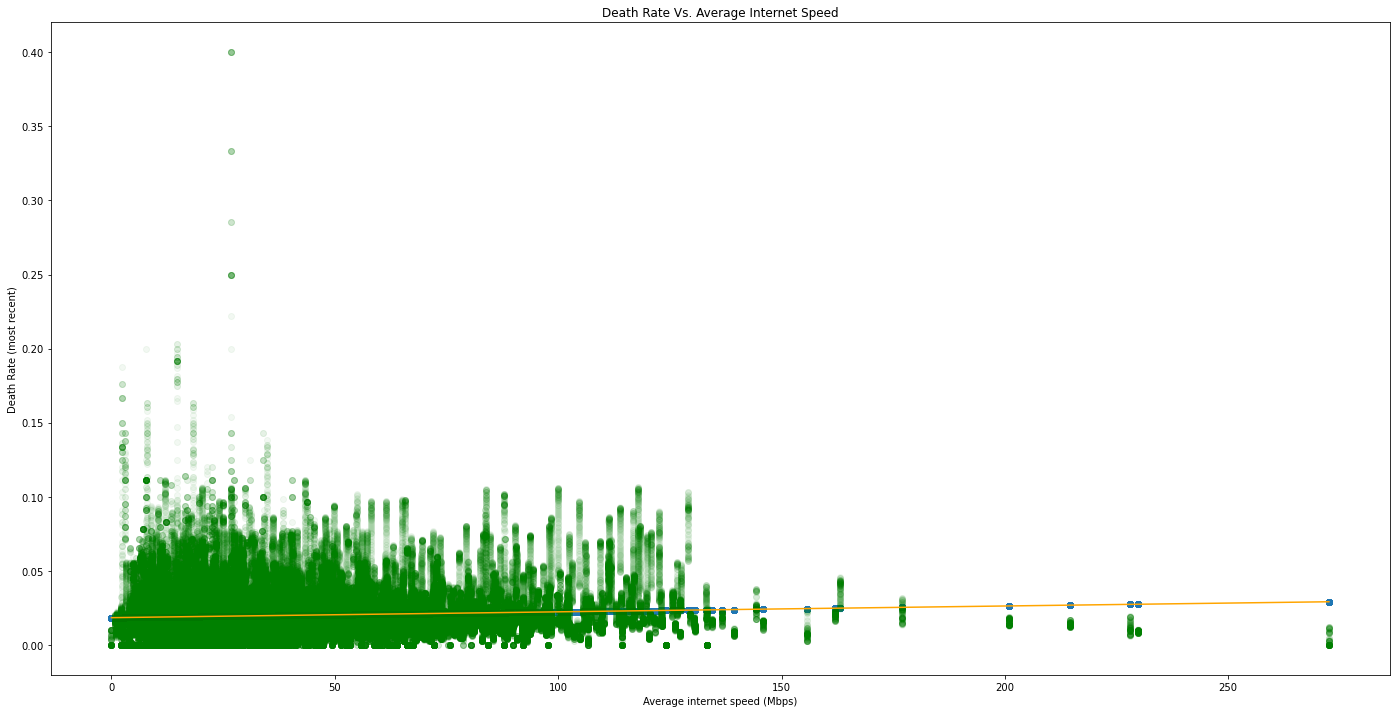

In [125]:
fig, plot = plt.subplots()
# plot = sns.scatterplot(
#     x='AverageMbps',
#     y='death_rate',
#     data=temp_df,
#     alpha=.08
# )

model = LinearRegression()
model.fit(
    temp_df[['AverageMbps']],
    temp_df['death_rate']
)

sorted_temp_df = temp_df.sort_values('AverageMbps')
y_pred = model.predict(sorted_temp_df[['AverageMbps']])

m = model.coef_[0]    # slope
b = model.intercept_  # intercept

y_pred_hand = m * sorted_temp_df['AverageMbps'] + b



plot = plt.scatter(sorted_temp_df.AverageMbps, y_pred)

plt.plot(sorted_temp_df.AverageMbps, y_pred_hand, c='orange')
plt.scatter(temp_df.AverageMbps,temp_df.death_rate, c='green',alpha=.05)
# plot = sns.regression(
#     x='AverageMbps',
#     y='death_rate',
#     data=temp_df,
# #     alpha=.08
# )

fig.set_size_inches(24,12)
plt.xlabel('Average internet speed (Mbps)')
plt.ylabel('Death Rate (most recent)')
plt.title('Death rate vs. average internet speed'.title())
plt.show()

In [126]:
# sns.regplot(
#     x='AverageMbps',
#     y='death_rate',
#     data=temp_df,
# # #     alpha=.08
# )

In [127]:
temp_df[['death_rate','AverageMbps']].cov()

,death_rate,AverageMbps
death_rate,0.000231,0.030119
AverageMbps,0.030119,765.217150


In [128]:
m

3.9360645170949315e-05

In [148]:
temp_df.corr().style.background_gradient(
    cmap='RdYlGn', 
    axis=None,
    vmin=-0.8, 
    vmax=0.8
)

,tot_deaths,tot_cases,death_rate,fips_code,dr_rating,AverageMbps,FastestAverageMbps,avg_mbps_rating,fast_mbps_rating
tot_deaths,1.000000,0.879719,0.223651,-0.055147,0.223815,0.167484,0.175881,0.144801,0.148373
tot_cases,0.879719,1.000000,0.018830,-0.068939,0.053989,0.152345,0.161510,0.137890,0.143833
death_rate,0.223651,0.018830,1.000000,0.009305,0.811708,0.071668,0.079740,0.056645,0.062302
fips_code,-0.055147,-0.068939,0.009305,1.000000,-0.019963,-0.018759,-0.024252,-0.020088,-0.024498
dr_rating,0.223815,0.053989,0.811708,-0.019963,1.000000,0.069841,0.083136,0.067682,0.073253
AverageMbps,0.167484,0.152345,0.071668,-0.018759,0.069841,1.000000,0.961158,0.882266,0.860665
FastestAverageMbps,0.175881,0.161510,0.079740,-0.024252,0.083136,0.961158,1.000000,0.880602,0.902378
avg_mbps_rating,0.144801,0.137890,0.056645,-0.020088,0.067682,0.882266,0.880602,1.000000,0.950792
fast_mbps_rating,0.148373,0.143833,0.062302,-0.024498,0.073253,0.860665,0.902378,0.950792,1.000000


In [147]:
county_covid_df.date.unique

<bound method Series.unique of 0         2020-01-21
1         2020-01-22
2         2020-01-23
3         2020-01-24
4         2020-01-24
             ...    
1933537   2021-11-17
1933538   2021-11-17
1933539   2021-11-17
1933540   2021-11-17
1933541   2021-11-17
Name: date, Length: 1933542, dtype: datetime64[ns]>

---

In [60]:
df.sample(10)

NameError: name 'df' is not defined

In [61]:
sub_df = temp_df.loc[temp_df['state'] == 'NY']
sub_df['trips_log'] = sub_df.trips.apply(lambda x: np.log(x))
sub_df['new_case_log'] = sub_df.new_case.apply(lambda x: np.log(x))
sub_df['new_death_log'] = sub_df.new_death.apply(lambda x: np.log(x))
sub_df['series_complete_yes_log'] = sub_df.series_complete_yes	.apply(lambda x: np.log(x))

AttributeError: 'DataFrame' object has no attribute 'trips'

In [ ]:
sub_df.sample(10)

In [ ]:
distances = [
    'trips',
    'trips_1_50', 
    'trips_50_500', 
    'trips_500'
]
distances_log = []


for distance in distances:
    label = str(distance+'_log')
    sub_df[label] = sub_df[distance].apply(lambda x: np.log(x))
    distances_log.append(label)

In [ ]:
sub_df[distances+['new_death','new_case']].corr().style.background_gradient(
    cmap='RdYlGn', 
    axis=None, 
#     vmin=-0.8, 
#     vmax=0.8
)

In [50]:
# creates melted df with log trips by distance
melted_sub = sub_df.melt(
    value_vars=distances_log,
    var_name='Distance',
    id_vars=['date','new_death_log','new_case_log']   
)

KeyError: 'trips'

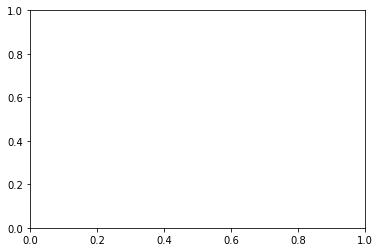

In [51]:
# melted_sub.groupby(by='Distance').size()

# melted_sub.shape
# plt.plot(melted_sub['value'],melted_sub['date'])#,'value',data=melted_sub.loc[melted_sub.Distance == 'trips'])
# plt.xlim(
    
# )
fig, ax = plt.subplots()
sns.lineplot(
    x=sub_df['date'],
    y=sub_df['trips'],
)
plt.xlim( 
    (date(2020, 3, 1), 
     date(2020, 5, 31))
)

fig.set_size_inches(24,8)
plt.show()

In [54]:
fig, ax = plt.subplots()
# ax = plt.plot(
#     sub_df.date,
#     sub_df.new_death_log.rolling(7, center=True).mean(), color='crimson', linewidth=3
# )
# ax2 = plt.twinx()
# ax2.plot(
#     sub_df.date,
#     sub_df.new_death_log.rolling(7, center=True).mean(), color='blue', linewidth=3
# )
sns.lineplot(
    x='date',
    y='value',
    hue='Distance', 
    data=melted_sub
)
# sns.lineplot(x='date',y='Distance')
fig.set_size_inches(24,8)
# plt.figure(figsize=(24,8))

plt.show()

In [53]:
sub_df.sort_values(by='date',inplace=True)
fig, ax = plt.subplots()
ax = plt.plot(
    sub_df.date,
    sub_df.new_case.rolling(7, center=True).mean(), color='crimson', linewidth=3
)

ax2 = plt.twinx()
ax2.plot(
    sub_df.date,
    sub_df.series_complete_yes, #.rolling(7, center=True).mean(),
    color='blue', linewidth=3
)

ax3 = plt.twinx()
ax3.plot(
    sub_df.date,
    sub_df.trips.rolling(7, center=True).mean(),
    color='green', linewidth=3
)

ax4 = plt.twinx()
ax4.plot(
    sub_df.date,
    sub_df.administered,
    color='green', linewidth=3
)


fig.set_size_inches(24,8)
plt.show()

In [ ]:
sub_df.sort_values(by='date',inplace=True)
fig, ax = plt.subplots()
ax = plt.plot(
    sub_df.date,
    sub_df.new_case.rolling(7, center=True).mean(), color='crimson', linewidth=3
)

ax2 = plt.twinx()
ax2.plot(
    sub_df.date,
    sub_df.series_complete_yes, #.rolling(7, center=True).mean(),
    color='blue', linewidth=3
)

ax3 = plt.twinx()
ax3.plot(
    sub_df.date,
    sub_df.trips.rolling(7, center=True).mean(),
    color='green', linewidth=3
)

ax4 = plt.twinx()
ax4.plot(
    sub_df.date,
    sub_df.administered,
    color='green', linewidth=3
)

ax5 = plt.twinx()
ax5.plot(
    sub_df.date,
    sub_df.death_rate

)

fig.set_size_inches(24,8)
plt.show()

In [ ]:
fig.axes

In [55]:
temp_df = sub_df.loc[pd.notnull(sub_df['new_case']) & pd.notnull(sub_df['trips'])]


# sns.set_style('ticks')

case_trips_model = LinearRegression()
case_trips_model.fit(temp_df[[ 'new_case' ]], temp_df['trips'])

y_pred = case_trips_model.predict(temp_df[['new_case']])

m = case_trips_model.coef_[0]    # slope
b = case_trips_model.intercept_  # intercept

y_pred_hand = m * temp_df['new_case']


# plot = sns.regplot(
#     y=sub_df.new_case,
#     x=sub_df.trips_log
# )
# plot.figure.set_size_inches(12,12)
temp_df.sort_values(by='trips',inplace=True)

plt.plot(
    temp_df['trips'],
    y_pred_hand
)

# # plt(figsize=(24,3))
# # .figure(figsize=(24,8))
# plt.show()


KeyError: 'new_case'

In [56]:

sns.lineplot(
    x=sub_df.date,
    y=sub_df[[
#     'date',
    'trips',
    'trips_1', 
    'trips_1_3', 
    'trips_3_5', 
    'trips_5_10',
    'trips_10_25',
    'trips_25_50', 
    'trips_50_100', 
    'trips_100_250', 
    'trips_250_500',
    'trips_500'
]],
    hue=sub_df[[
#     'date',
    'trips',
    'trips_1', 
    'trips_1_3', 
    'trips_3_5', 
    'trips_5_10',
    'trips_10_25',
    'trips_25_50', 
    'trips_50_100', 
    'trips_100_250', 
    'trips_250_500',
    'trips_500'
    ]],
)

KeyError: "None of [Index(['trips', 'trips_1', 'trips_1_3', 'trips_3_5', 'trips_5_10',\n       'trips_10_25', 'trips_25_50', 'trips_50_100', 'trips_100_250',\n       'trips_250_500', 'trips_500'],\n      dtype='object')] are in the [columns]"

In [ ]:
values = sub_df[[
    'trips',
    'trips_1',
    'trips_1_3',
    'trips_3_5',
    'trips_5_10',
    'trips_10_25',
    'trips_25_50',
    'trips_50_100',
    'trips_100_250',
    'trips_250_500',
    'trips_500']]
pd.melt(sub_df[['date']],values)

In [ ]:
sub_df

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(
    sub_df.new_death,
    sub_df.trips
    
)
plt.xlabel('new_deaths')
plt.ylabel('trips')
plt.show()

In [ ]:
ma_non_nan_trips = state_data1_dict["MA"].copy().loc[pd.notnull(state_data1_dict['MA'].trips)] 
temp_x = np.arange(len(ma_non_nan_trips.index))

# define custom function to fit
def quadratic(X, a, b, c):
    '''Second-order polynomial function'''
    return a*X**5 + b*X + c


# fit function parameters
quad_opt, quad_cov = curve_fit(quadratic, temp_x, ma_non_nan_trips.trips)

# plot results
ma_trips_scatter = sns.scatterplot(
    x=temp_x,
    y=ma_non_nan_trips.trips
)
plt.plot(temp_x, quadratic(temp_x, *quad_opt), c='orange', alpha=0.5) # predicted data

# plt.xlabel('Mean age (years)')
# plt.ylabel('Population change (%)')
plt.tight_layout()
plt.show()

In [ ]:
model = np.polynomial.Polynomial.fit(
    temp_x,
    ma_non_nan_trips.trips,
    3)

# plot output
sns.scatterplot(data=ma_non_nan_trips, x=temp_x, y='trips')
# trips = auto_df['horsepower'].sort_values()
plt.plot(temp_x, model(temp_x), c='orange')
plt.show()

In [ ]:
r2s = []
for i in range (0,30):
    model = np.polynomial.Polynomial.fit(
        temp_x,
        ma_non_nan_trips.trips,
        i)
    
    r2 = np.corrcoef(model(temp_x), ma_non_nan_trips['trips'])[0, 1]
    
    r2s.append(r2)


plt.plot(range(30),r2s)
plt.xticks(range(30))
plt.grid()
plt.show()
r2s

In [ ]:
r2chngs = []

for i in range(len(r2s)):
#     print(i)
    r2chng = r2s[i]-r2s[i-1]
    r2chngs.append(r2chng)

plt.plot(range(30),r2chngs)
plt.xticks(range(30))
plt.grid()
plt.show()
r2s

-----
## County mapping

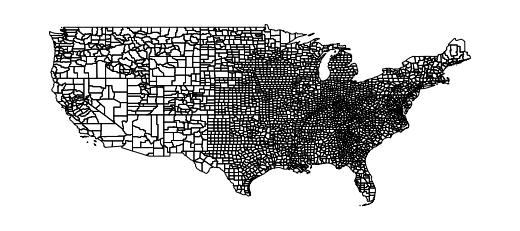

In [1]:
# Instructions from https://www.python-graph-gallery.com/choropleth-map-geopandas-python

# Import the geopandas and geoplot libraries
import geopandas as gpd
import geoplot as gplt
from bokeh.models import LinearColorMapper
from bokeh.palettes import brewer
import mapclassify as mc

# Load the json file with county coordinates
geoData = gpd.read_file('US-counties.geojson')

# Make sure the "id" column is an integer
geoData.id = geoData.id.astype(str).astype(int)

# Remove Alaska, Hawaii and Puerto Rico.
stateToRemove = ['02', '15', '72']
geoData = geoData[~geoData.STATE.isin(stateToRemove)]
geoData.rename(columns={'id':'fips_code'}, inplace=True)

# Basic plot with just county outlines
gplt.polyplot(geoData, figsize=(20, 4));

In [2]:
county_df

NameError: name 'county_df' is not defined

In [3]:
geoData

,fips_code,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,1001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402..."
1,1009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840..."
2,1017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772..."
3,1021,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929..."
4,1033,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.58170, -88.13925 34.587..."
...,...,...,...,...,...,...,...,...
3216,51001,0500000US51001,51,001,Accomack,County,449.496,"MULTIPOLYGON (((-75.24227 38.02721, -75.29687 ..."
3217,51021,0500000US51021,51,021,Bland,County,357.725,"POLYGON ((-81.22510 37.23487, -81.20477 37.243..."
3218,51027,0500000US51027,51,027,Buchanan,County,502.763,"POLYGON ((-81.96830 37.53780, -81.92787 37.512..."
3219,51037,0500000US51037,51,037,Charlotte,County,475.271,"POLYGON ((-78.44332 37.07940, -78.49303 36.891..."


In [23]:
county_geo_covid_current = pd.merge(geoData, county_df, how='left', on='fips_code')
county_geo_covid_current.shape

(3109, 23)

In [24]:


# fills empty values w. mean

county_geo_covid_current.dropna(subset=['death_rate'], inplace=True)

palette = brewer['YlGnBu'][8]

color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40, nan_color = '#d9d9d9')



In [25]:
# county_geo_covid_current.loc[county_geo_covid_current.death_rate.notna()]

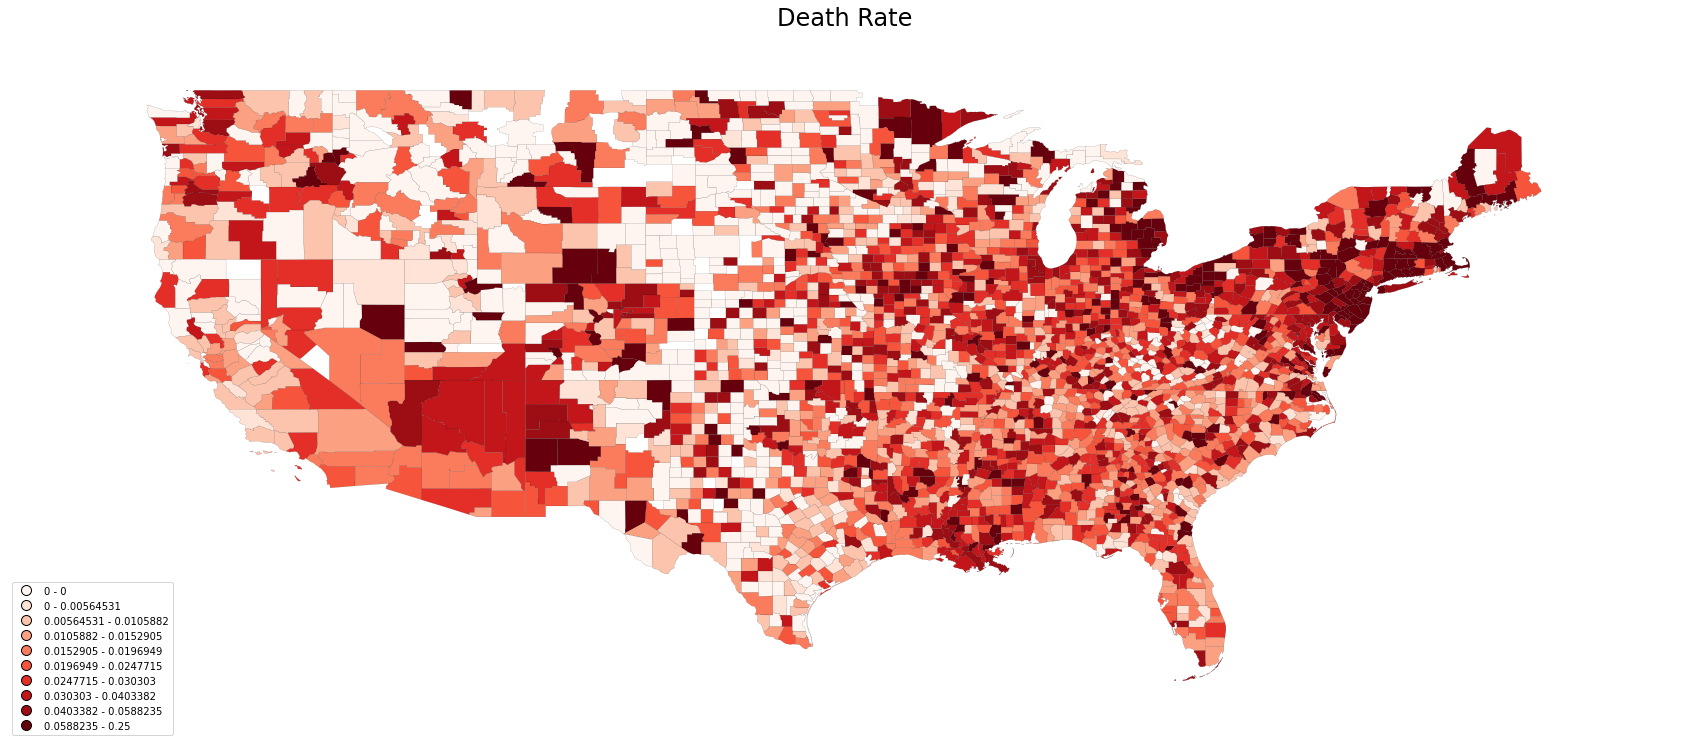

In [26]:
# https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0
# link above to instructions on filling na values and displaying as greyed out


fig, ax = plt.subplots(1, 1, figsize=(30, 20))
ax.axis('off')

# Set up the color sheme:
scheme = mc.Quantiles(county_geo_covid_current['death_rate'], k=10)

# Map
gplt.choropleth(county_geo_covid_current, 
    hue="death_rate", 
    linewidth=.1,
    scheme=scheme,
    cmap='Reds',
    legend=True,
    edgecolor='black',
    ax=ax,
    
);

ax.set_title('Death Rate', fontsize=24);


KeyboardInterrupt: 

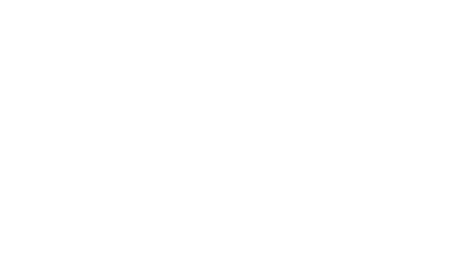

In [32]:
ax = gplt.kdeplot(
    county_geo_covid_current.head(1000), clip=county_geo_covid_current.geometry,
    shade=True, cmap='Reds',
    projection=gplt.crs.AlbersEqualArea())
gplt.polyplot(geoData, ax=ax, zorder=1)
